In [3]:
import os 
from langchain_google_genai import ChatGoogleGenerativeAI,GoogleGenerativeAIEmbeddings
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import mplcursors
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from typing import List
load_dotenv()
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")

ModuleNotFoundError: No module named 'mplcursors'

In [ ]:
embedding=GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [ ]:
def plot_2D(x_values:List[float],
            y_values:List[float],
            labels:List[str])->None:
    fig,ax=plt.subplots()
    scatter=ax.scatter(x_values,y_values,alpha=0.5,edgecolors="k",s=40)
    cursor=mplcursors.cursor(scatter,hover=True)

    #aes
    ax.set_title('Embedding visualization in 2D')  # Add a title
    ax.set_xlabel('X_1')  # Add x-axis label
    ax.set_ylabel('X_2')  # Add y-axis label
    plt.show()

def get_embeddings(text:str)->List:
        return embedding.embed_query(text)

def compute_cosine_similarity(embeddings:np.ndarray,idx1:int,idx2:int)-> float:
        return cosine_similarity(embeddings[idx1],embeddings[idx2])

In [ ]:
     

# Group one 
animal_sen_1 = "Elephants are known for their exceptional memory and intelligence, often living in complex social structures."
animal_sen_2 = "The blue whale is the largest animal on the planet, with a heart the size of a small car."
animal_sen_3 = "Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop."


sport_sen_1 = "Soccer, known as football outside of North America, is the world's most popular sport, with a fan base that spans across continents."
sport_sen_2 = "The modern Olympic Games, revived in 1896, are a global event that brings together athletes from over 200 nations."
sport_sen_3 = "Serena Williams has dominated women's tennis with 23 Grand Slam singles titles, making her one of the greatest athletes of all time."


modern_society_sen_1 = "The advent of the internet has transformed modern society, enabling global connectivity and access to information at an unprecedented scale."
modern_society_sen_2 = "Climate change has become one of the most pressing issues of modern society, with a growing consensus on the need for sustainable practices."
modern_society_sen_3 = "Social media has reshaped the way we communicate and consume information, influencing everything from politics to personal relationships."


programming_sen_1 = "C++ programmers harness the power of low-level memory manipulation, crafting efficient and high-performance software for a variety of applications."
programming_sen_2 = "Java developers thrive in building platform-independent solutions, leveraging the language's 'write once, run anywhere' philosophy for versatile and scalable applications."
programming_sen_3 = "Python programmers embrace the language's readability and expressiveness, creating elegant and concise code that facilitates rapid development across diverse domains."

# combine all the examples in one list
all_input_text = [
    animal_sen_1, animal_sen_2, animal_sen_3,
    sport_sen_1, sport_sen_2, sport_sen_3, 
    modern_society_sen_1, modern_society_sen_2, modern_society_sen_3,
    programming_sen_1, programming_sen_2, programming_sen_3
    ]



In [ ]:
embeddings=[]
for input_text in all_input_text:
    emb=get_embeddings(input_text)
    embeddings.append(emb)

In [ ]:
print(len(embeddings[1])) #

768


In [ ]:
embeddings[1]

[0.008508340455591679, -0.01638675294816494, -0.012957418337464333, -0.028329625725746155, 0.03818304091691971, -0.025272207334637642, 0.05634935200214386, -0.00029791370616294444, 0.0182496327906847, 0.057307567447423935, -0.0009795399382710457, 0.0084548220038414, 0.03921041637659073, 0.004601550754159689, -0.008843468502163887, 0.0023007486015558243, 0.019163694232702255, 0.031162871047854424, 0.0171084962785244, 0.01933363266289234, 0.0043013128452003, -0.046512383967638016, -0.007320105098187923, -0.03246278688311577, 0.008620829321444035, -0.014296993613243103, 0.028967292979359627, -0.06014639884233475, 0.0013617930235341191, 0.052175089716911316, -0.061997197568416595, 0.017197642475366592, -0.0479305237531662, -0.014416305348277092, -0.026745980605483055, -0.03651990741491318, 0.019001858308911324, 0.04811025410890579, 0.008713607676327229, 0.023459207266569138, -0.002131430897861719, 0.009109186008572578, -0.021046798676252365, -0.019220123067498207, 0.030895398929715157, -0.

In [ ]:
embeddings_array=np.array(embeddings)

In [ ]:
print(embeddings_array.shape)

(12, 768)


In [ ]:
embeddings_array[0]

array([ 3.67899947e-02, -9.86460969e-03, -3.78078446e-02, -2.17014402e-02,
       -9.98646859e-03,  2.44422089e-02, -2.96082497e-02,  5.55084134e-03,
        5.56727825e-03,  2.76133530e-02, -3.03503172e-03,  1.08976113e-02,
        5.11414967e-02, -2.36444944e-03, -2.32174564e-02, -5.06928004e-03,
       -1.80212762e-02,  1.88048799e-02,  1.99017730e-02, -4.22889702e-02,
       -3.75382267e-02,  5.26612140e-02,  2.90302914e-02,  1.34941451e-02,
       -3.14490497e-02, -6.55693607e-03,  3.50740291e-02, -6.23461939e-02,
        2.25100815e-02,  5.55431657e-02, -4.19418924e-02,  1.13348581e-03,
       -1.18840281e-02,  6.53314078e-03, -2.31508408e-02, -2.57134605e-02,
       -2.90511176e-02, -8.60830303e-03,  2.02593170e-02,  4.00740951e-02,
        3.38199286e-04,  2.04882808e-02, -5.26564047e-02, -2.26968974e-02,
        1.23359337e-02, -4.03021611e-02, -3.23761180e-02,  5.42347170e-02,
       -1.41575420e-02, -2.90028788e-02,  1.22145098e-02, -6.80085132e-03,
        2.05509625e-02, -

In [ ]:
pca_model=PCA(n_components=3)
pca_model.fit(embeddings_array)
new_values=pca_model.transform(embeddings_array)


In [ ]:
print(new_values.shape)

(12, 3)


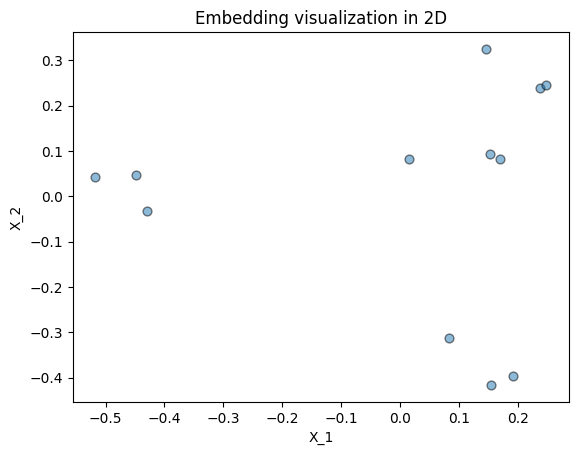

In [ ]:
plot_2D(new_values[:,0],new_values[:,1],all_input_text)

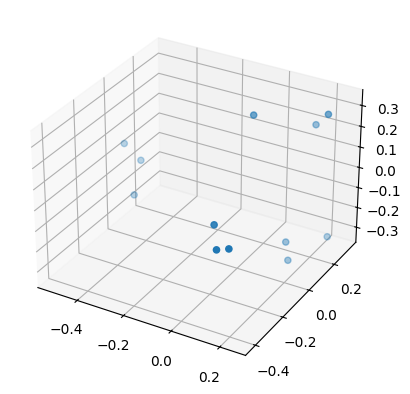

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(new_values[:, 0], new_values[:, 1], new_values[:, 2])

In [ ]:
query="whaht is the l;argest animal and also the animal havng high memory"
q_v=embedding.embed_query(query)

In [ ]:
model=ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [ ]:
system="As a helpful chatbot, your role is to assist users by analyzing their questions alongside retrieved content.\
        Dispense answers exclusively from the provided content and refrain from incorporating personal knowledge if the answer is\
        absent in the retrieved information."


In [ ]:
Retrieved_content=['Elephants are known for their exceptional memory and intelligence, often living in complex social structures.', 'The blue whale is the largest animal on the planet, with a heart the size of a small car.', 'Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop.']

In [ ]:
prompt=f"#Retrieved Content:{Retrieved_content}\n\n #User'sQuery :{query}"

In [ ]:
print(prompt)

#Retrieved Content:['Elephants are known for their exceptional memory and intelligence, often living in complex social structures.', 'The blue whale is the largest animal on the planet, with a heart the size of a small car.', 'Peregrine falcons are among the fastest birds, reaching over 200 miles per hour during their hunting stoop.']

 #User'sQuery :what are the things we can do in holi but not in christmas?


In [ ]:
messages=[
    {"role":"system","content":system,},
    {"role":"user","content":prompt,}

]

In [ ]:
model.invoke(messages)

AIMessage(content='The provided text states that **the blue whale is the largest animal on the planet**.  It also mentions that **elephants are known for their exceptional memory**. \n', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-2fe5ab52-076e-47fc-8829-eb1cfdd07d3a-0')